# Exercises on Code-Based Cryptography

In [27]:
from sage.all import matrix, GF, identity_matrix
import cme, bike, isd
import matplotlib.pyplot as plt
import time

### Exercise 1. Evaluate the performance of the Classic McEleice Cryptosystem for different parameters

**Parameters**
- **n:** Length of the code.
- **t:** Error correction capability.
- **m:** Degree of the finite field of the code.
- **tn:** Number of trials per parameter set.

In [28]:
# Define the parameters for the test batch
batch = [((7, 1, 3), [], [], [], [], []),
         ((15, 3, 4), [], [], [], [], []),
         ((31, 6, 5), [], [], [], [], []),
         ((63, 10, 6), [], [], [], [], []),
         ((127, 17, 7), [], [], [], [], []),
         ((196, 6, 8), [], [], [], [], []),
         ((256, 7, 8), [], [], [], [], []),
         ((490, 12, 9), [], [], [], [], []),
         ((3488, 64, 12), [], [], [], [], [])]
trials = 5

In [29]:
# Perform the evaluations
for (p, l, ml, kl, tl, mtl) in batch:
    
    # Encryption trials
    for _ in range(trials):
        
        # Encapsulate the Classic McEleice parameters
        params = cme.classic_mceleice_encapsulate_parameters(p[0], p[1], p[2])
        
        # Start timing for key generation
        cme_key_start = time.process_time() * 1000
        
        # Generate the key pair
        key_pair = cme.classic_mceleice_generate_key_pair(params)
        
        # End timing for key generation
        cme_key_end = time.process_time() * 1000
        
        # Generate the error vector
        e = cme.classic_mceleice_generate_error_vector(params)
        
        # Generate the capsule and session key
        c, K = cme.classic_mceleice_encapsulate(key_pair[1], e)
        
        # Start timing for Classic McEleice decapsulation
        cme_start = time.process_time() * 1000
        
        # Decrypt the secret vector with private key
        nK = cme.classic_mceleice_decapsulate(params, key_pair[0], c)
        
        # End timing for Classic McEleice decapsulation
        cme_end = time.process_time() * 1000
        
        # Start timing for ISD attack
        isd_start = time.process_time() * 1000
        
        # Calculate the public key
        I = matrix(GF(2), identity_matrix(key_pair[1].nrows()))
        H = I.augment(key_pair[1])
        
        # Perform the attack
        a = isd.isd_prange(H, c[0], params[1])
        
        # Generate a session key using the attack
        if a is not None:
            aK = cme.classic_mceleice_decapsulate(params, key_pair[0], c, a)
        else:
            aK = None
        
        # End timing for ISD attack
        isd_end = time.process_time() * 1000
        
        # Save the results for statistical purposes
        l.append(K == nK)
        ml.append(K == aK)
        kl.append(cme_key_end - cme_key_start)
        tl.append(cme_end - cme_start)
        mtl.append(isd_end - isd_start)

Parity-Check Matrix generated successfully.

Parity-Check Matrix generated successfully.

Parity-Check Matrix generated successfully.

Parity-Check Matrix generated successfully.

Parity-Check Matrix generated successfully.

Parity-Check Matrix generated successfully.

Parity-Check Matrix generated successfully.

Parity-Check Matrix generated successfully.

Parity-Check Matrix generated successfully.

Parity-Check Matrix generated successfully.

Parity-Check Matrix generated successfully.

Parity-Check Matrix generated successfully.

Parity-Check Matrix generated successfully.

Parity-Check Matrix generated successfully.

Parity-Check Matrix generated successfully.

Parity-Check Matrix generated successfully.

Parity-Check Matrix generated successfully.

Parity-Check Matrix generated successfully.

Parity-Check Matrix generated successfully.

Parity-Check Matrix generated successfully.

Parity-Check Matrix generated successfully.

Parity-Check Matrix generated successfully.

Parity-Che

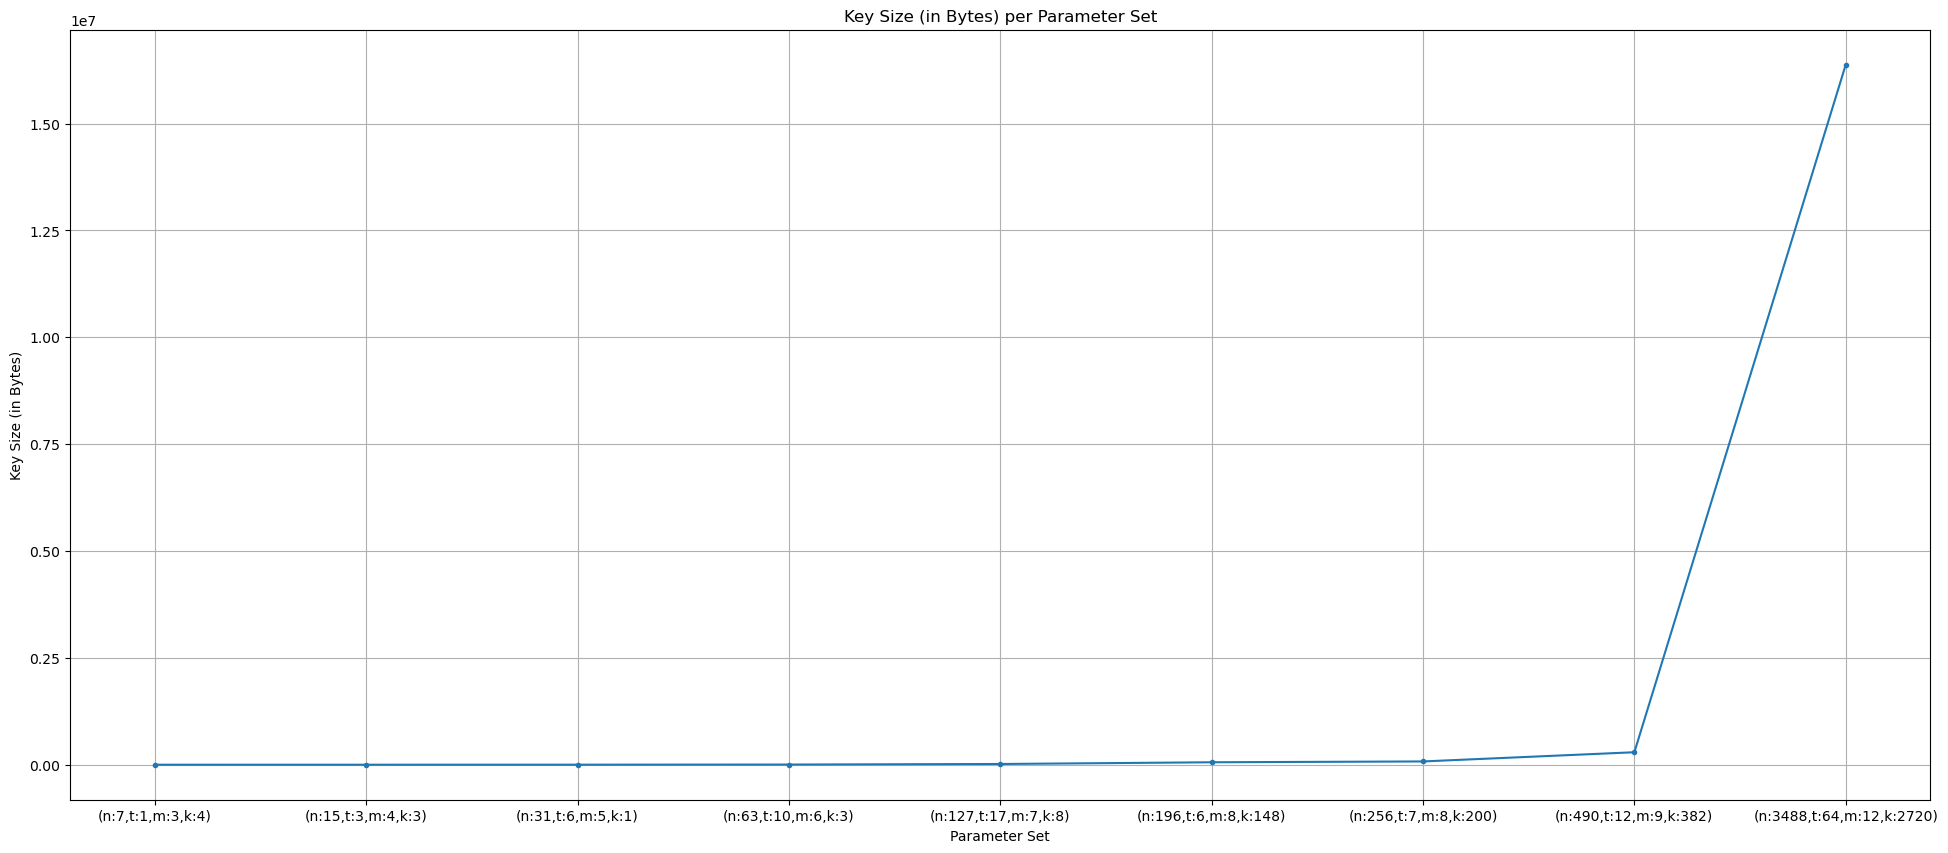

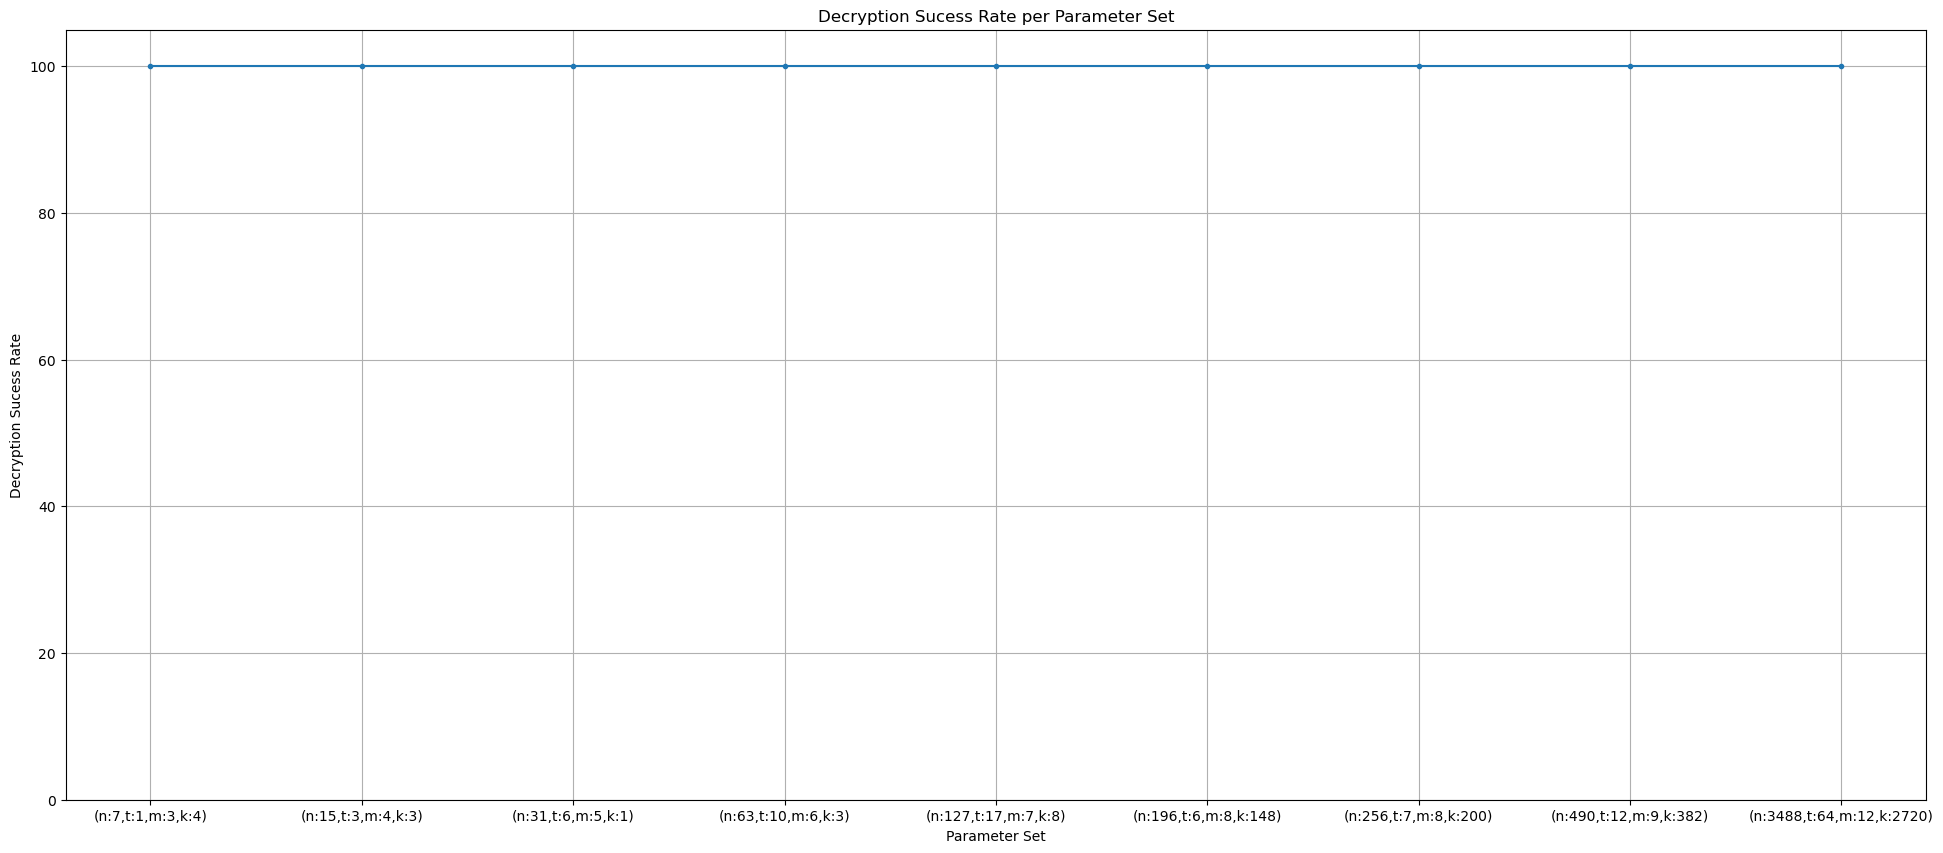

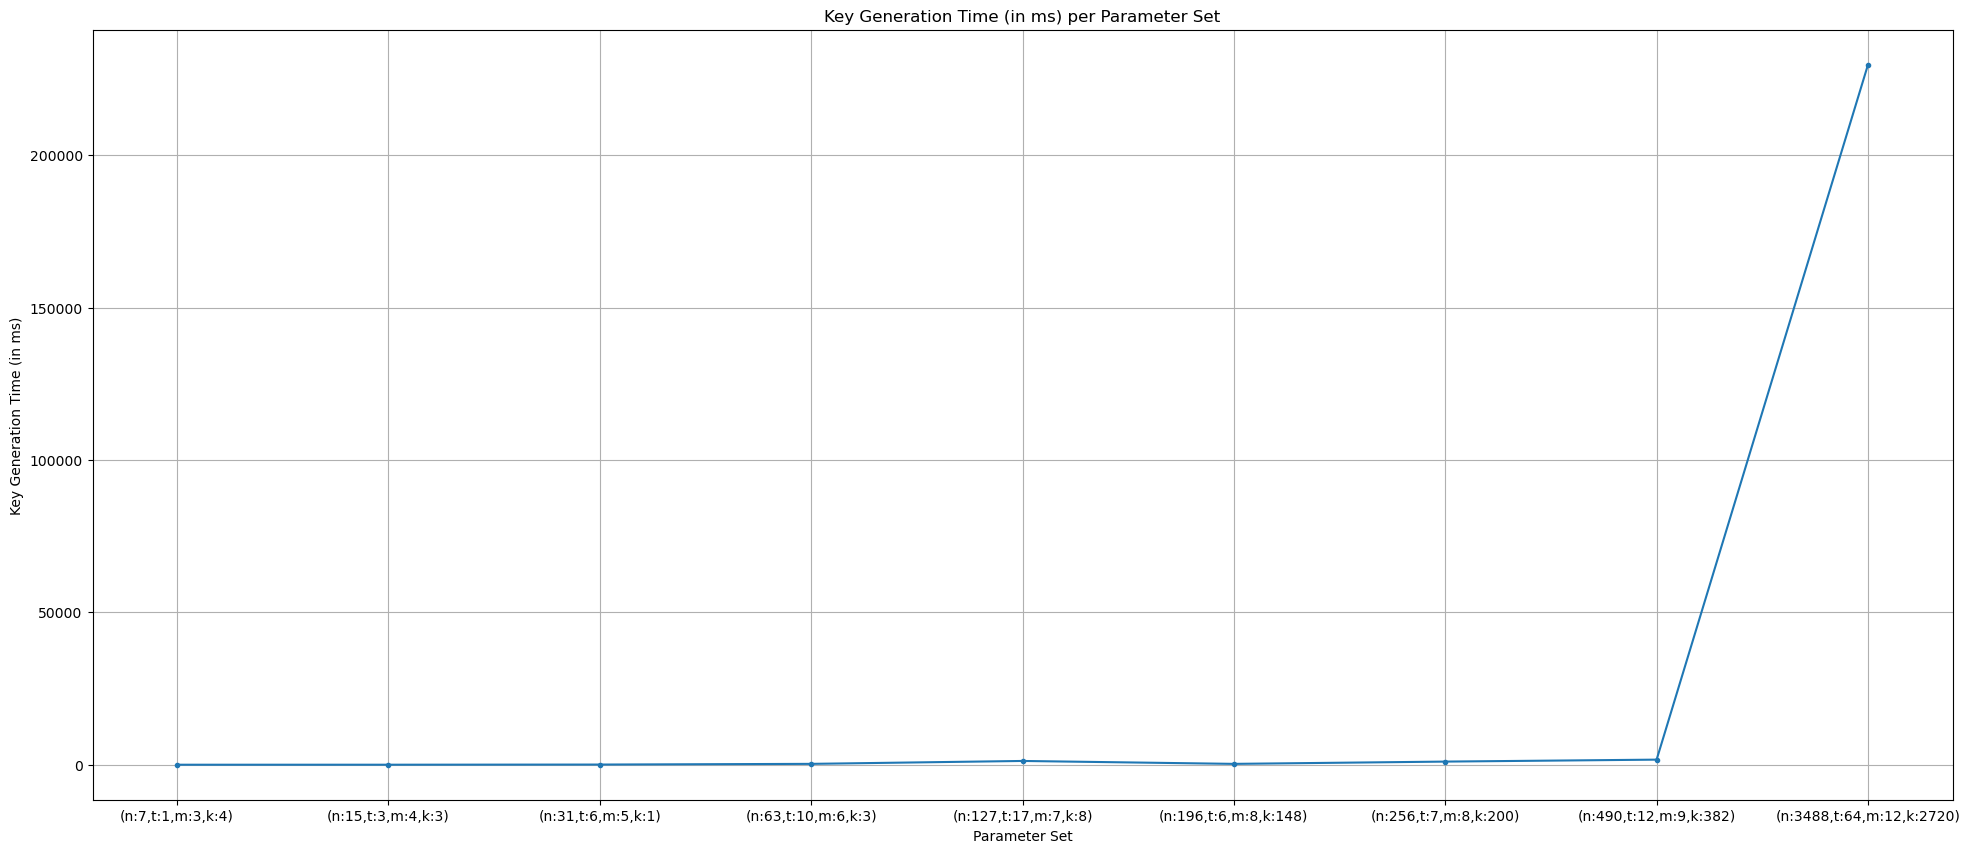

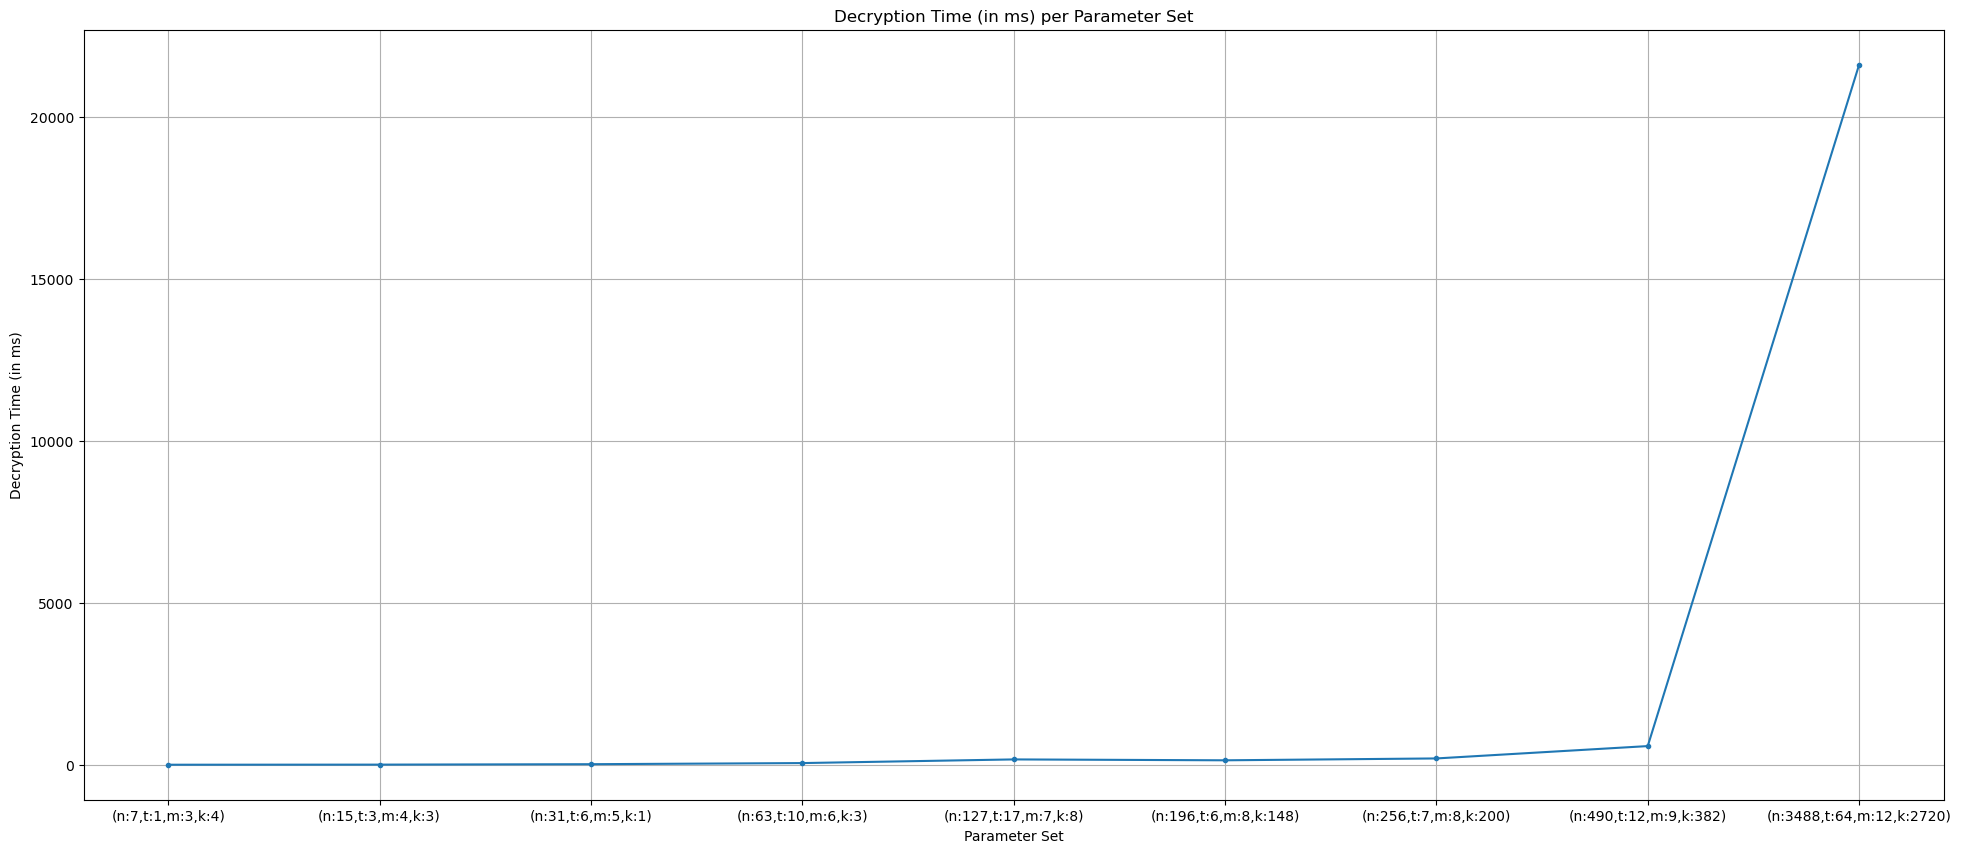

In [30]:
# Calculate the axis arrays
x = [f"(n:{p[0]},t:{p[1]},m:{p[2]},k:{p[0] - p[1] * p[2]})" for (p, _, _, _, _, _) in batch]
y_1 = [m*t*(n - m*t) + n * (2**m) for ((n, t, m), _, _, _, _, _) in batch]
y_2 = [(sum(l) / len(l)) * 100 for (_, l, _, _, _, _) in batch]
y_3 = [(sum(kl) / len(kl)) for (_, _, _, kl, _, _) in batch]
y_4 = [(sum(tl) / len(tl)) for (_, _, _, _, tl, _) in batch]

# Define the plot to show key sizes depending on Parameter Set
plt.figure(figsize=(24,10))
plt.plot(x, y_1, marker='.')
plt.title("Key Size (in Bytes) per Parameter Set")
plt.xlabel("Parameter Set")
plt.ylabel("Key Size (in Bytes)")
plt.grid(True)
plt.show()

# Define the plot to show decryption sucess rate depending on Parameter Set
plt.figure(figsize=(24,10))
plt.plot(x, y_2, marker='.')
plt.title("Decryption Sucess Rate per Parameter Set")
plt.xlabel("Parameter Set")
plt.ylabel("Decryption Sucess Rate")
plt.ylim(0, 105)
plt.grid(True)
plt.show()

# Define the plot to show key generation time depending on Parameter Set
plt.figure(figsize=(24,10))
plt.plot(x, y_3, marker='.')
plt.title("Key Generation Time (in ms) per Parameter Set")
plt.xlabel("Parameter Set")
plt.ylabel("Key Generation Time (in ms)")
plt.grid(True)
plt.show()

# Define the plot to show decryption time depending on Parameter Set
plt.figure(figsize=(24,10))
plt.plot(x, y_4, marker='.')
plt.title("Decryption Time (in ms) per Parameter Set")
plt.xlabel("Parameter Set")
plt.ylabel("Decryption Time (in ms)")
plt.grid(True)
plt.show()

### Exercise 2. Evaluate the performance of the BIKE Cryptosystem for different parameters

**Parameters**
- **r:** Length of the code.
- **w:** Key hamming weight.
- **t:** Error hamming weight.
- **l:** Key and message length in bits.
- **tn:** Number of trials per parameter set.

### Exercise 3. Evaluate the performance of ISD attack for both Cryptosystems and find an accurate parameter threshold

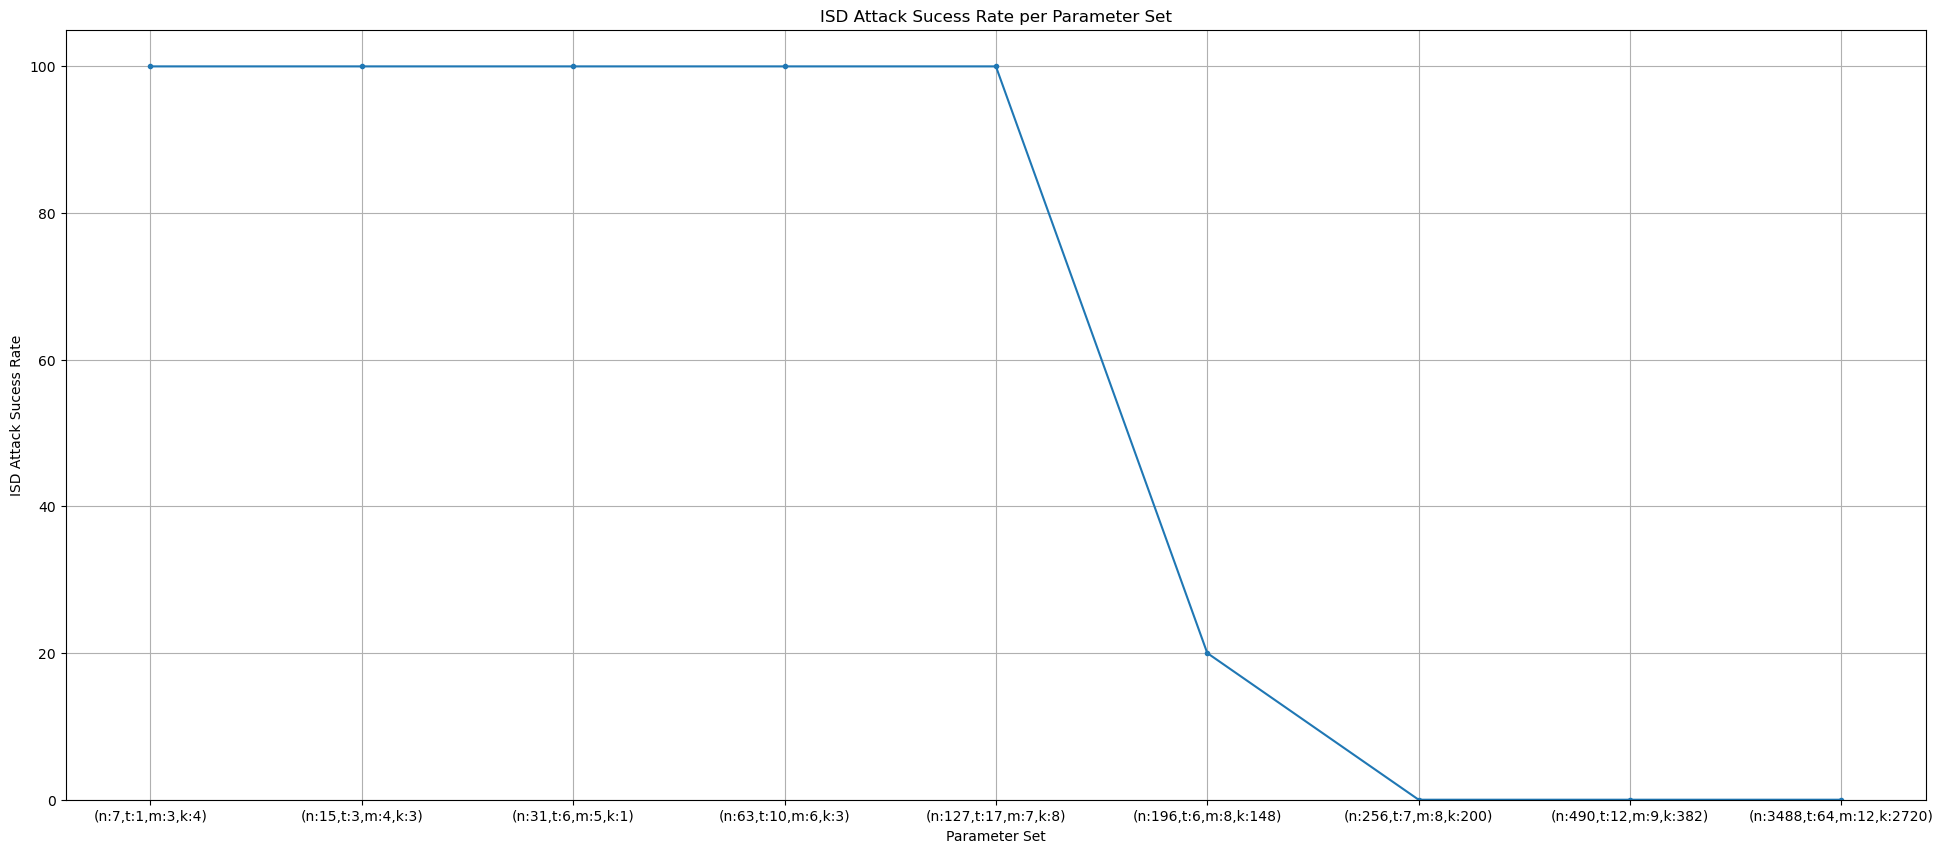

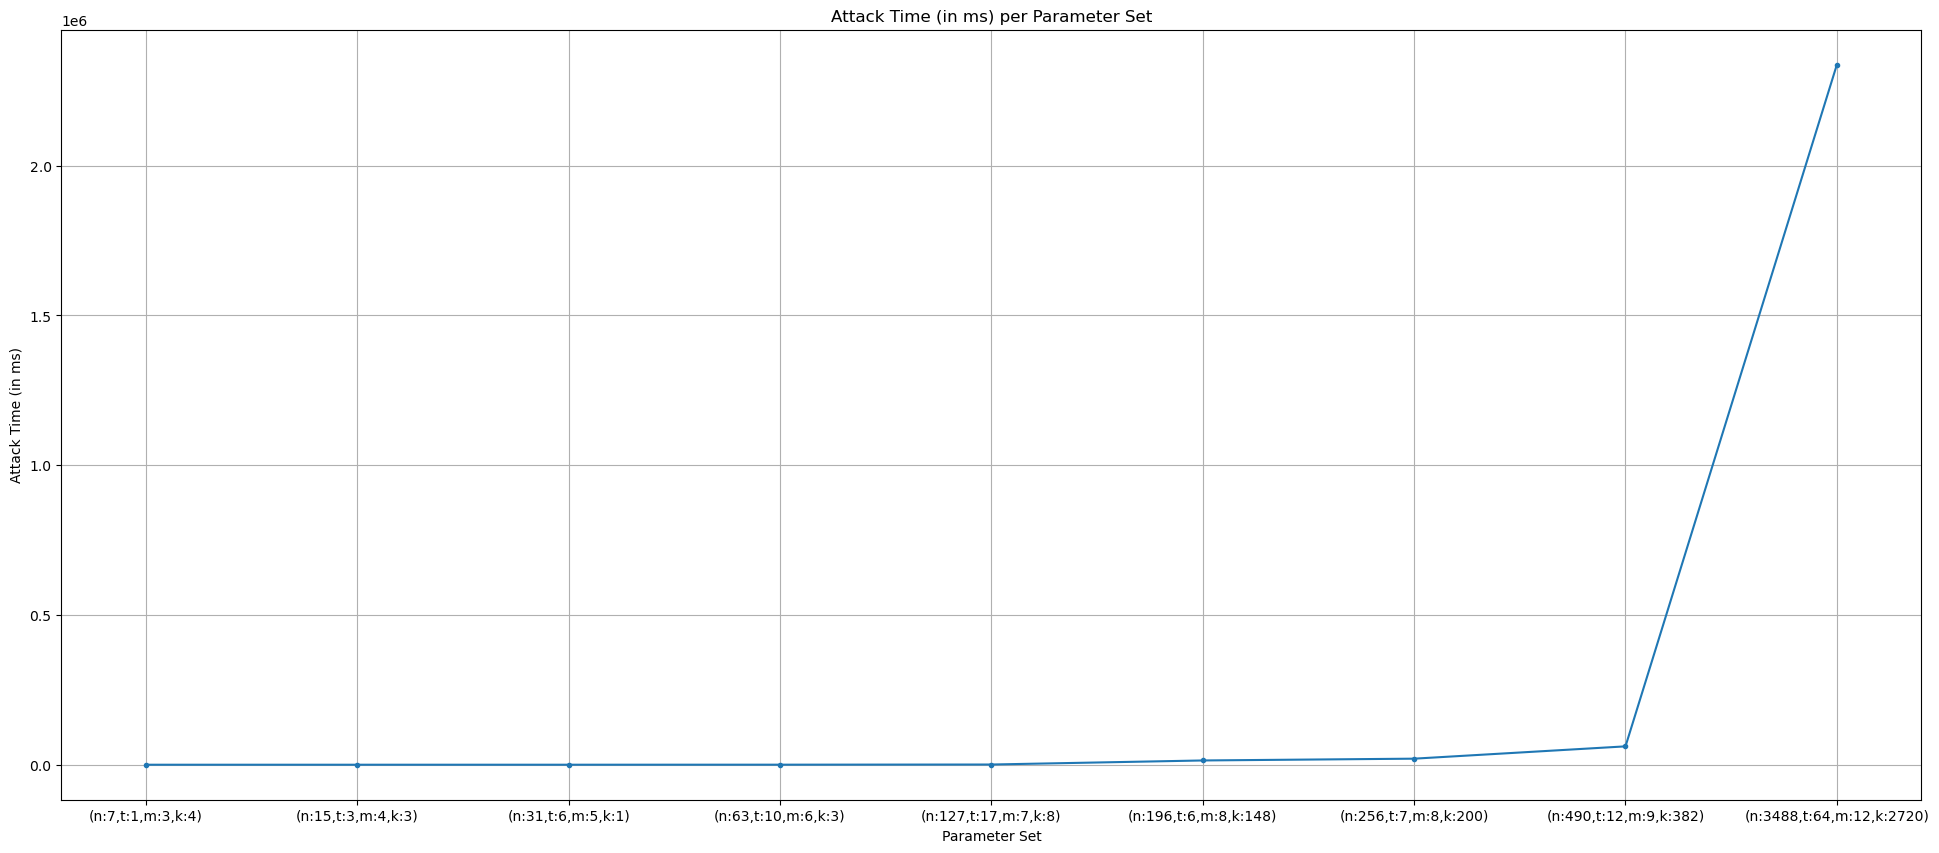

In [31]:
# Calculate the axis arrays
x = [f"(n:{p[0]},t:{p[1]},m:{p[2]},k:{p[0] - p[1] * p[2]})" for (p, _, _, _, _, _) in batch]
y_1 = [(sum(l) / len(l)) * 100 for (_, _, l, _, _, _) in batch]
y_2 = [(sum(tl) / len(tl)) * 100 for (_, _, _, _, _, tl) in batch]

# Define the plot to show ISD attack sucess rate depending on Parameter Set
plt.figure(figsize=(24,10))
plt.plot(x, y_1, marker='.')
plt.title("ISD Attack Sucess Rate per Parameter Set")
plt.xlabel("Parameter Set")
plt.ylabel("ISD Attack Sucess Rate")
plt.ylim(0, 105)
plt.grid(True)
plt.show()

# Define the plot to show attack time depending on Parameter Set
plt.figure(figsize=(24,10))
plt.plot(x, y_2, marker='.')
plt.title("Attack Time (in ms) per Parameter Set")
plt.xlabel("Parameter Set")
plt.ylabel("Attack Time (in ms)")
plt.grid(True)
plt.show()